In [1]:
import numpy as np
import pandas as pd
import pickle
import torch.nn as nn
from torch.utils.data import DataLoader
import json, ast, sys, csv, random
import plotly.express as px
import math
import datetime
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#Implement training process
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error
csv.field_size_limit(sys.maxsize)
URL = "/media/data/ccarmona/memoria/dataset/rl_csvs/"
from matplotlib import rcParams
plt.rcParams.update({'font.size': 13})

In [2]:
model_name = 'Model_Adam'

In [3]:
def open_files_final(model_name, disc_fac):
    nombre_compuesto = "_" + model_name + "_gamma_" + str(disc_fac) + "_"##SALT Nombre archivos
    #neo_df_final = pd.read_csv(URL + "neo_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    ql_df_final = pd.read_csv(URL + "ql_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_final = pd.read_csv(URL + "sarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_final = pd.read_csv(URL + "exsarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [ql_df_final, sarsa_df_final, exsarsa_df_final]
def open_files_iter(model_name, disc_fac):
    nombre_compuesto = "_" + model_name + "_gamma_" + str(disc_fac) + "_"##SALT Nombre archivos
    #neo_df_iter = pd.read_csv(URL + "neo_df_iteration" + nombre_compuesto +".csv", engine='python', encoding='utf-8')
    ql_df_iter = pd.read_csv(URL + "ql_df_iteration" + nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_iter = pd.read_csv(URL + "sarsa_df_iteration"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_iter = pd.read_csv(URL + "exsarsa_df_iteration"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [ql_df_iter, sarsa_df_iter, exsarsa_df_iter]
def comma(num):
    num = str(num).replace(".",",")
    return num

In [4]:
def open_files_final2(model_name, epsilon):
    nombre_compuesto = model_name + str(epsilon) + "_"
    ql_df_final = pd.read_csv(URL + "ql_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_final = pd.read_csv(URL + "sarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_final = pd.read_csv(URL + "exsarsa_df_final"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [ql_df_final, sarsa_df_final, exsarsa_df_final]
def open_files_iter2(model_name, epsilon):
    nombre_compuesto = model_name + str(epsilon) + "_"
    ql_df_iter = pd.read_csv(URL + "ql_df_iteration" + nombre_compuesto +".csv", engine='python', encoding='utf-8')
    sarsa_df_iter = pd.read_csv(URL + "sarsa_df_iteration"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    exsarsa_df_iter = pd.read_csv(URL + "exsarsa_df_iteration"+ nombre_compuesto +".csv", engine='python', encoding='utf-8')
    return [ql_df_iter, sarsa_df_iter, exsarsa_df_iter]

In [5]:
model_00999 = open_files_final(model_name,0.0999) ## gamma 0.9
model_025 = open_files_final(model_name,0.25) ## gamma 0.09
model_05 = open_files_final(model_name,0.5) ## gamma 0.009
model_075 = open_files_final(model_name,0.75) ## gamma 0.999
model_09 = open_files_final(model_name,0.9) ## gamma 0.009
model_0999 = open_files_final2(model_name,0.75) ## gamma 0.999, se recicla el tuneo de epsilon 0.75 el cual uso ese gamma

model_00999_iter= open_files_iter(model_name,0.0999)  ## gamma 0.9
model_025_iter = open_files_iter(model_name,0.25) ## gamma 0.09
model_05_iter = open_files_iter(model_name,0.5) ## gamma 0.009
model_075_iter = open_files_iter(model_name,0.75) ## gamma 0.999
model_09_iter = open_files_iter(model_name,0.9) ## gamma 0.009
model_0999_iter = open_files_iter2(model_name,0.75) ## gamma 0.999, se recicla el tuneo de epsilon 0.75 el cual uso ese gamma

In [6]:
np.mean(model_00999[0]['real_new'])

85.118

In [7]:
np.mean(model_025[0]['real_new'])

85.118

In [8]:
np.mean(model_05[0]['real_new'])

85.118

In [9]:
np.mean(model_075[0]['real_new'])

85.118

In [10]:
np.mean(model_09[0]['real_new'])

85.118

In [11]:
np.mean(model_0999[0]['real_new'])

85.118

In [12]:
matplotlib.rc('text', usetex = False)

### Latencia promedio de cada algoritmo + promedio real por  lr

In [13]:
def Valores_Promedio(df):
    real_value = [np.mean(df[0]['real_new']) for i in range(len(df))]
    old_pred = [np.mean(df[0]['pred_old']) for i in range(len(df))]
    h = [
        #np.mean(df[0]['pred_new']), # NEO
        np.mean(df[0]['pred_new']), # QL
        np.mean(df[1]['pred_new']), # SARSA
        np.mean(df[2]['pred_new']), # EXSARSA
    ]
    return h, real_value, old_pred
def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.75*height,
                comma(round(float(height),2)),
                ha='center', va='bottom')

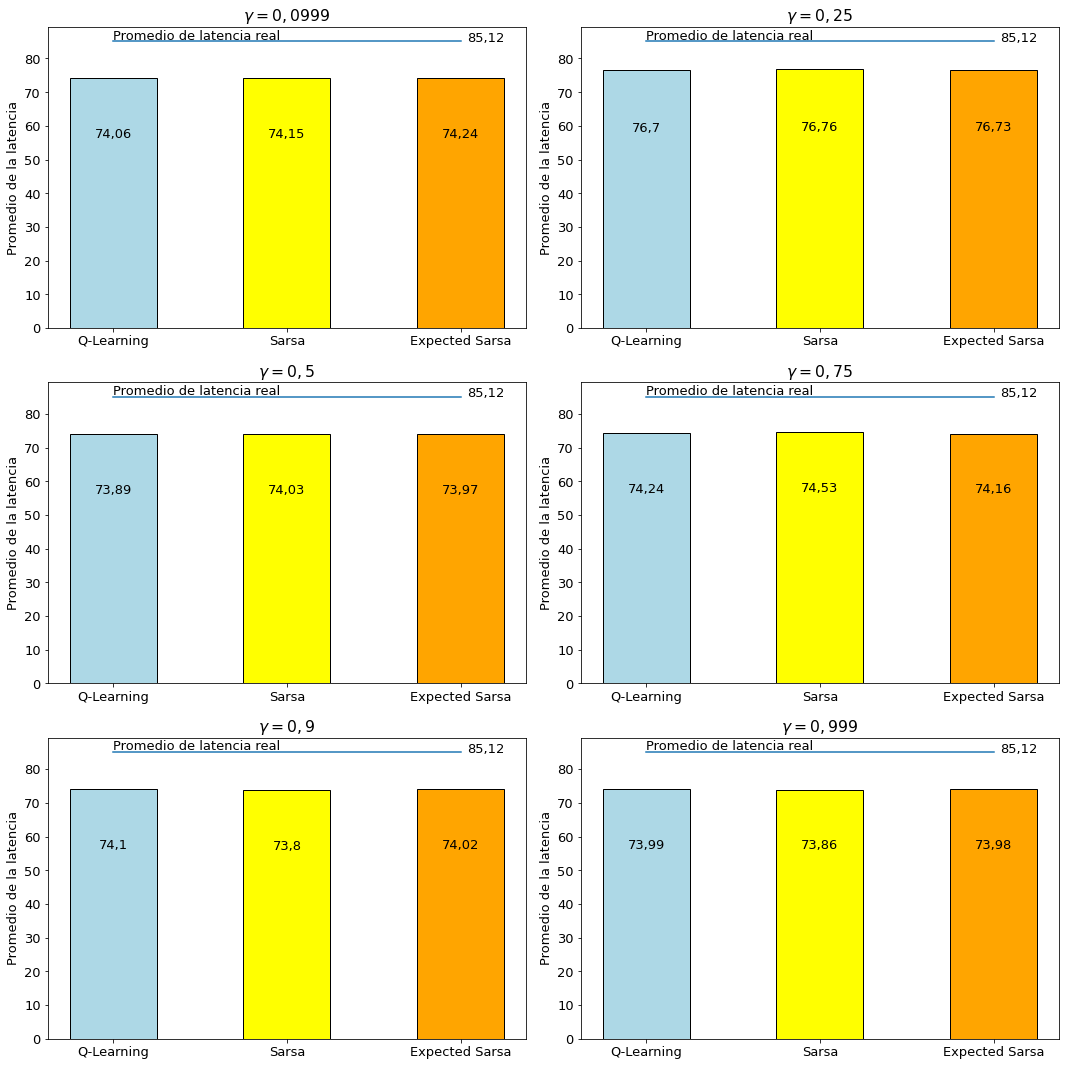

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15,15))
width = 0.15
ind = np.arange(3)*width*2
c = ['lightblue','yellow','orange']
names = ('Q-Learning','Sarsa','Expected Sarsa')


h1, real_value1, old_pred1  = Valores_Promedio(model_00999)
rects1 = ax1.bar(ind, h1, width, color=c, edgecolor = 'black',align='center')
line11 = ax1.plot(ind, real_value1);
#line22 = ax1.plot(ind, old_pred1);
ax1.text(ind[0],real_value1[0] + 0.55,'Promedio de latencia real')
#ax1.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax1.text(ind[2]+0.01,real_value1[0] - 0.1,comma(round(real_value1[0],2)))
#ax1.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax1.set_xticks(ind)
ax1.set_xticklabels(names)
autolabel(rects1,ax1)
ax1.title.set_text(r'$\gamma=0,0999$')
ax1.set_ylabel('Promedio de la latencia')

h2, real_value2, old_pred2  = Valores_Promedio(model_025)
rects2 = ax2.bar(ind, h2, width, color=c, edgecolor = 'black',align='center')
line22 = ax2.plot(ind, real_value1);
#line22 = ax2.plot(ind, old_pred1);
ax2.text(ind[0],real_value2[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax2.text(ind[2]+0.01,real_value2[0] - 0.1,comma(round(real_value2[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax2.set_xticks(ind)
ax2.set_xticklabels(names)
autolabel(rects2,ax2)
ax2.title.set_text(r'$\gamma=0,25$')
ax2.set_ylabel('Promedio de la latencia')

h3, real_value3, old_pred3  = Valores_Promedio(model_05)
rects3 = ax3.bar(ind, h3, width, color=c, edgecolor = 'black',align='center')
line33 = ax3.plot(ind, real_value1);
#line22 = ax2.plot(ind, old_pred1);
ax3.text(ind[0],real_value3[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax3.text(ind[2]+0.01,real_value3[0] - 0.1,comma(round(real_value3[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax3.set_xticks(ind)
ax3.set_xticklabels(names)
autolabel(rects3,ax3)
ax3.title.set_text(r'$\gamma=0,5$')
ax3.set_ylabel('Promedio de la latencia')

h4, real_value4, old_pred4  = Valores_Promedio(model_075)
rects4 = ax4.bar(ind, h4, width, color=c, edgecolor = 'black',align='center')
line44 = ax4.plot(ind, real_value4);
#line22 = ax2.plot(ind, old_pred1);
ax4.text(ind[0],real_value4[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax4.text(ind[2]+0.01,real_value4[0] - 0.1,comma(round(real_value4[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax4.set_xticks(ind)
ax4.set_xticklabels(names)
autolabel(rects4,ax4)
ax4.title.set_text(r'$\gamma=0,75$')
ax4.set_ylabel('Promedio de la latencia')

h5, real_value5, old_pred5  = Valores_Promedio(model_09)
rects5 = ax5.bar(ind, h5, width, color=c, edgecolor = 'black',align='center')
line55 = ax5.plot(ind, real_value5);
#line22 = ax2.plot(ind, old_pred1);
ax5.text(ind[0],real_value5[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax5.text(ind[2]+0.01,real_value5[0] - 0.1,comma(round(real_value5[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax5.set_xticks(ind)
ax5.set_xticklabels(names)
autolabel(rects5,ax5)
ax5.title.set_text(r'$\gamma=0,9$')
ax5.set_ylabel('Promedio de la latencia')

h6, real_value6, old_pred6  = Valores_Promedio(model_0999)
rects6 = ax6.bar(ind, h6, width, color=c, edgecolor = 'black',align='center')
line66 = ax6.plot(ind, real_value6);
#line22 = ax2.plot(ind, old_pred1);
ax6.text(ind[0],real_value6[0] + 0.55,'Promedio de latencia real')
#ax2.text(ind[0],old_pred1[0] + 0.55,'Promedio de latencia red neuronal')
ax6.text(ind[2]+0.01,real_value6[0] - 0.1,comma(round(real_value6[0],2)))
#ax2.text(ind[3]+0.01,old_pred1[0] - 0.1,str(round(old_pred1[0],2)))
ax6.set_xticks(ind)
ax6.set_xticklabels(names)
autolabel(rects6,ax6)
ax6.title.set_text(r'$\gamma=0,999$')
ax6.set_ylabel('Promedio de la latencia')

fig.show()
fig.tight_layout()
plt.savefig("RL_GAMMA_promedio_latencia.pdf")

### Latencia promedio por iteración de  cada consulta para cada algoritmo + promedio real

In [15]:
def PromedioPorIteracionFormato(df, num_iter):
    aux_dict = {}
    values_pred = []
    for i in range(num_iter):
        aux_dict[str(i)] = {"index" : 0, "preds" : [], "mean_preds" : []}
    for i in range(len(df)):
        a = [df['index'][i],df['iteration'][i],df['pred_new'][i]]
        aux_dict[str(a[1])]["index"] = a[0]
        aux_dict[str(a[1])]["preds"].append(float(a[2]))
    for k,v in aux_dict.items():
        aux_dict[k]["mean_preds"] = np.mean(aux_dict[k]["preds"])
        values_pred.append(np.mean(aux_dict[k]["preds"]))
    index_list = [int(x) for x in list(aux_dict.keys())]
    return index_list, values_pred
def PromedioPorIteracion(df):
    index_list, values_pred = PromedioPorIteracionFormato(df)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(index_list, values_pred);

In [16]:
index_list_ql_00999, values_pred_ql_00999 = PromedioPorIteracionFormato(model_00999_iter[0],200)
index_list_sarsa_00999, values_pred_sarsa_00999 = PromedioPorIteracionFormato(model_00999_iter[1],200)
index_list_exsarsa_00999, values_pred_exsarsa_00999 = PromedioPorIteracionFormato(model_00999_iter[2],200)

index_list_ql_025, values_pred_ql_025 = PromedioPorIteracionFormato(model_025_iter[0],200)
index_list_sarsa_025, values_pred_sarsa_025 = PromedioPorIteracionFormato(model_025_iter[1],200)
index_list_exsarsa_025, values_pred_exsarsa_025 = PromedioPorIteracionFormato(model_025_iter[2],200)

index_list_ql_05, values_pred_ql_05 = PromedioPorIteracionFormato(model_05_iter[0],200)
index_list_sarsa_05, values_pred_sarsa_05 = PromedioPorIteracionFormato(model_05_iter[1],200)
index_list_exsarsa_05, values_pred_exsarsa_05 = PromedioPorIteracionFormato(model_05_iter[2],200)

index_list_ql_075, values_pred_ql_075 = PromedioPorIteracionFormato(model_075_iter[0],200)
index_list_sarsa_075, values_pred_sarsa_075 = PromedioPorIteracionFormato(model_075_iter[1],200)
index_list_exsarsa_075, values_pred_exsarsa_075 = PromedioPorIteracionFormato(model_075_iter[2],200)

index_list_ql_09, values_pred_ql_09 = PromedioPorIteracionFormato(model_09_iter[0],200)
index_list_sarsa_09, values_pred_sarsa_09 = PromedioPorIteracionFormato(model_09_iter[1],200)
index_list_exsarsa_09, values_pred_exsarsa_09 = PromedioPorIteracionFormato(model_09_iter[2],200)

index_list_ql_0999, values_pred_ql_0999 = PromedioPorIteracionFormato(model_0999_iter[0],200)
index_list_sarsa_0999, values_pred_sarsa_0999 = PromedioPorIteracionFormato(model_0999_iter[1],200)
index_list_exsarsa_0999, values_pred_exsarsa_0999 = PromedioPorIteracionFormato(model_0999_iter[2],200)

In [17]:
values_pred_ql_0999

[80.40814706671237,
 77.93779119038582,
 79.39896894812584,
 77.8506092158556,
 76.7781548538208,
 75.91233978068828,
 75.19905750381946,
 74.70582933354378,
 74.81425153660774,
 74.46165985548497,
 74.27859390819073,
 74.31565878093242,
 74.32180688202381,
 74.26401747572422,
 74.19940157568455,
 74.21900110840798,
 74.16158936429024,
 74.0384674270153,
 73.98918228256703,
 73.90106329774856,
 73.95333415806293,
 74.01950839304924,
 73.77418184137345,
 74.03643162989616,
 74.03652467632294,
 74.14824437379838,
 74.19705068552494,
 74.19498046433925,
 74.22965090107918,
 74.28874016153813,
 74.23530670297146,
 74.06480422699451,
 74.05603307795525,
 74.09002423453332,
 73.97882062697411,
 74.02975711607932,
 73.9514982894659,
 73.9445584487915,
 74.09320176088809,
 74.02908614909649,
 73.96007023441791,
 73.87749092292786,
 73.92125658392906,
 73.83513869559765,
 73.8547673393488,
 73.93025364923477,
 74.02029943144322,
 73.93698000884056,
 73.91845276021958,
 73.94530535793305,
 74.01

In [18]:
real_value = np.ones(len(index_list_ql_0999))*np.mean(model_0999_iter[0]['real_new'])
old_predict = np.ones(len(index_list_ql_0999))*np.mean(model_0999_iter[0]['pred_old'])

In [19]:
np.mean(model_0999_iter[0]['real_new'])

85.118

In [20]:
np.mean(model_09_iter[0]['real_new'])

85.118

In [21]:
np.mean(model_00999_iter[0]['real_new'])

85.118

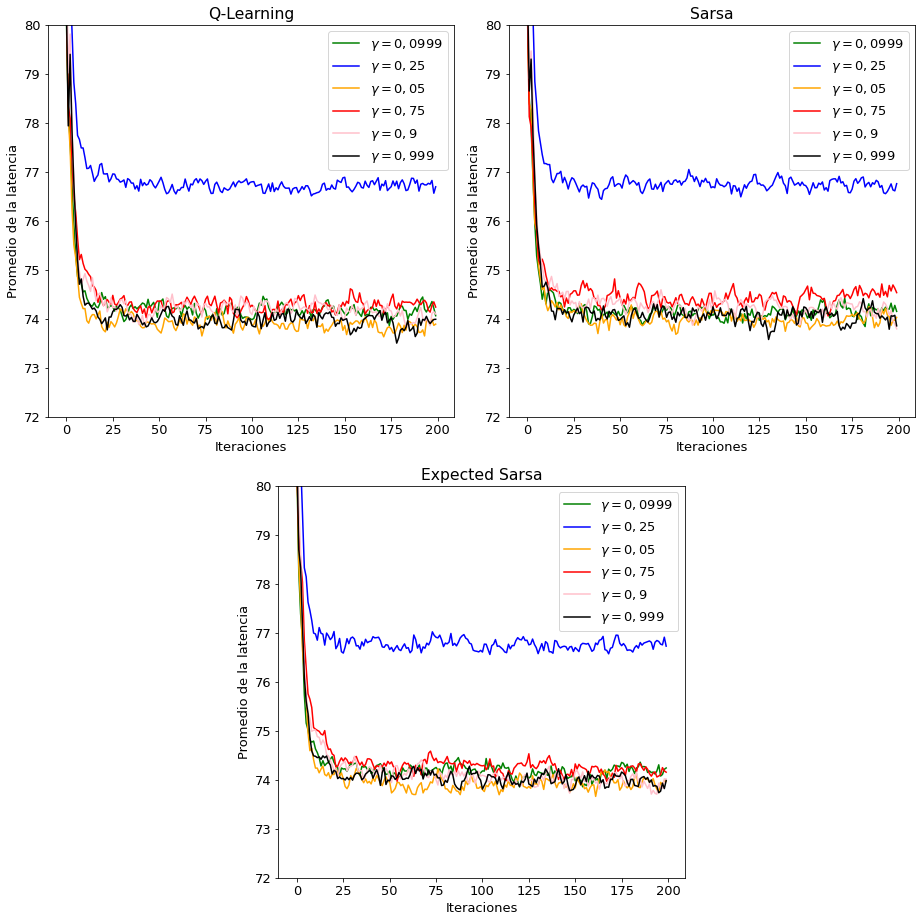

In [22]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot2grid((2,4),(0,0), colspan=2)
c = ['green','blue','orange', 'red','pink','black']
names = ('Q-Learning','Sarsa','Expected Sarsa')
width = 0.2
ax.set_title('Q-Learning')
ax.plot(index_list_ql_00999, values_pred_ql_00999, color=c[0], label = r'$\gamma=0,0999$')
ax.plot(index_list_ql_025, values_pred_ql_025, color=c[1], label = r'$\gamma=0,25$')
ax.plot(index_list_ql_05, values_pred_ql_05, color=c[2], label = r'$\gamma=0,05$')
ax.plot(index_list_ql_075, values_pred_ql_075, color=c[3], label = r'$\gamma=0,75$')
ax.plot(index_list_ql_09, values_pred_ql_09, color=c[4], label = r'$\gamma=0,9$')
ax.plot(index_list_ql_0999, values_pred_ql_0999, color=c[5], label = r'$\gamma=0,999$')
ax.set_ylabel('Promedio de la latencia')
ax.set_xlabel('Iteraciones')
ax.legend()


ax1 = plt.subplot2grid((2,4),(0,2), colspan=2)
ax1.set_title('Sarsa')
ax1.plot(index_list_sarsa_00999, values_pred_sarsa_00999, color=c[0], label = r'$\gamma=0,0999$')
ax1.plot(index_list_sarsa_025, values_pred_sarsa_025, color=c[1], label = r'$\gamma=0,25$')
ax1.plot(index_list_sarsa_05, values_pred_sarsa_05, color=c[2], label = r'$\gamma=0,05$')
ax1.plot(index_list_sarsa_075, values_pred_sarsa_075, color=c[3], label = r'$\gamma=0,75$')
ax1.plot(index_list_sarsa_09, values_pred_sarsa_09, color=c[4], label = r'$\gamma=0,9$')
ax1.plot(index_list_sarsa_0999, values_pred_sarsa_0999, color=c[5], label = r'$\gamma=0,999$')
ax1.set_ylabel('Promedio de la latencia')
ax1.set_xlabel('Iteraciones')
ax1.legend()


ax2 = plt.subplot2grid((2,4),(1,1), colspan=2)
ax2.set_title('Expected Sarsa')
ax2.plot(index_list_exsarsa_00999, values_pred_exsarsa_00999, color=c[0], label = r'$\gamma=0,0999$')
ax2.plot(index_list_exsarsa_025, values_pred_exsarsa_025, color=c[1], label = r'$\gamma=0,25$')
ax2.plot(index_list_exsarsa_05, values_pred_exsarsa_05, color=c[2], label = r'$\gamma=0,05$')
ax2.plot(index_list_exsarsa_075, values_pred_exsarsa_075, color=c[3], label = r'$\gamma=0,75$')
ax2.plot(index_list_exsarsa_09, values_pred_exsarsa_09, color=c[4], label = r'$\gamma=0,9$')
ax2.plot(index_list_exsarsa_0999, values_pred_exsarsa_0999, color=c[5], label = r'$\gamma=0,999$')
ax2.set_ylabel('Promedio de la latencia')
ax2.set_xlabel('Iteraciones')
ax2.legend()

ax.set_ylim([72, 80])
ax1.set_ylim([72, 80])
ax2.set_ylim([72, 80])

fig.tight_layout()
plt.savefig("RL_GAMMA_convergencia.pdf")